# **13E054VI Veštačka inteligencija**

**Drugi domaći zadatak**  
student: Aleksandra Ljubenović 2020/0117

# Zadatak 1

<u>Metod eliminacije</u>

<img src="VI_dz2_z1a_1.jpeg" style="width: 50%;">
<img src="VI_dz2_z1a_2.jpeg" style="width: 50%;">

<u>Uzorkovanje sa odbacivanjem</u>

p(c+|f+,g+) ~ (# p(\*,\*,c+,\*,f+,g+)) / (# p(\*,\*,\*,\*,f+,g+)) 

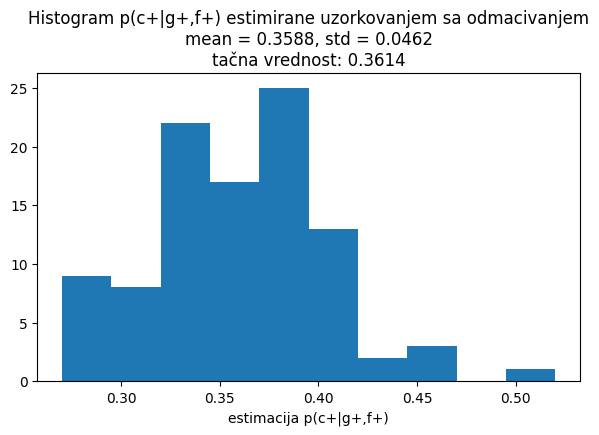

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

N = 100     # veličina uzorka
Nr = 100    # broj ponavljanja procedure

# Tabele (uslovnih) verovatnoća

p_a = np.array([0.6, 0.4])                                    # (a)
p_b = np.array([[0.7,0.3],[0.2,0.8]])                         # (a,b)                 
p_c = np.array([[0.7,0.3],[0.3,0.7]])                         # (a,c)
p_e = np.array([[[0.1,0.9],[0.5,0.5]],[[0.2,0.8],[0.8,0.2]]]) # (b,c,e)
p_f = np.array([[0.4,0.6],[0.6,0.4]])                         # (e,f)
p_g = np.array([[0.8,0.2],[0.3,0.7]])                         # (e,g)

# Estimacija uslovne verovatnoće p(c+|f+,g+)

p_arr = np.zeros((Nr))

for i in range(Nr):

    S = 0
    
    n_samples = 0
    while(n_samples < N):
        
        # Uzorkovanje promenljivih
        # a
        if random.random() <= p_a[0]:
            a = 0
        else:
            a = 1
        # b
        if random.random() <= p_b[a,0]:
            b = 0
        else:
            b = 1
        # c
        if random.random() <= p_c[a,0]:
            c = 0
        else:
            c = 1
        # e
        if random.random() <= p_e[b,c,0]:
            e = 0
        else:
            e = 1
        # f
        if random.random() <= p_f[e,0]:   # odbacivanje!
            f = 0
            continue
        else:
            f = 1
            # g
            if random.random() <= p_g[e,0]:   # odbacivanje!
                g = 0
                continue
            else:
                g = 1
                n_samples += 1

                if c == 1:
                    S += 1        
    
    # Estimacija tražene verovatnoće za jedan uzorak
    p_est = S/N
    p_arr[i] = p_est

p_mean = np.mean(p_arr)
p_std = np.std(p_arr)

plt.figure(figsize=(7,4))
plt.hist(p_arr,bins = round(np.sqrt(len(p_arr))))
plt.xlabel("estimacija p(c+|g+,f+)")
plt.title("Histogram p(c+|g+,f+) estimirane uzorkovanjem sa odmacivanjem\n"
            "mean = {}, std = {}\n"
                "tačna vrednost: 0.3614".format(round(p_mean,4),round(p_std,4)));


<u>Gibsovo uzorkovanje</u>

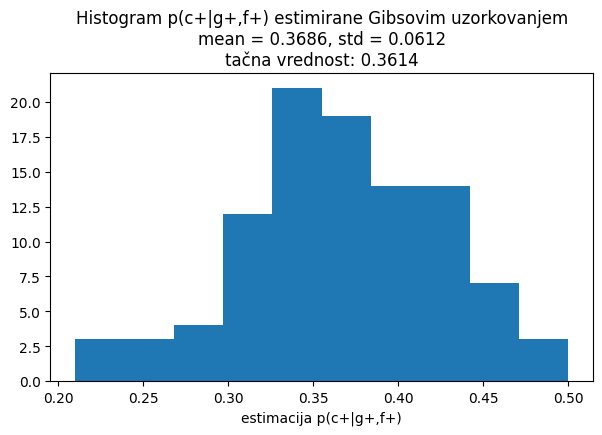

In [3]:
p_arr = np.zeros((Nr))

for i in range(Nr):

    f = 1
    g = 1
    # nasumična inicijalizacija
    (a,b,c,e) = tuple([int(random.random()//0.5) for _ in range(4)])

    # generisanje odbiraka
    S = 0
    for _ in range(N):
        
        # A ~ p(A|MP(A)) ~ p(B|A)p(C|A)p(A)
        tmp = random.random()
        p_tmp = p_b[0,b]*p_c[0,c]*p_a[0] / (p_b[0,b]*p_c[0,c]*p_a[0] + p_b[1,b]*p_c[1,c]*p_a[1])
        if tmp <= p_tmp:
            a = 0
        else:
            a = 1

        # B ~ p(B|MP(B)) ~ p(E|B,C)p(B|A)
        tmp = random.random()
        p_tmp = p_e[0,c,e]*p_b[a,0] / (p_e[0,c,e]*p_b[a,0] + p_e[1,c,e]*p_b[a,1])
        if tmp <= p_tmp:
            b = 0
        else:
            b = 1

        # C ~ p(C|MP(C)) ~ p(E|B,C)p(C|A)
        tmp = random.random()
        p_tmp = p_e[b,0,e]*p_c[a,0] / (p_e[b,0,e]*p_c[a,0] + p_e[b,1,e]*p_c[a,1])
        if tmp <= p_tmp:
            c = 0
        else:
            c = 1
            S += 1

        # E ~ p(E|MP(E)) ~ p(f+|E)p(g+|E)p(E|B,C)
        tmp = random.random()
        p_tmp = p_f[0,f]*p_g[0,g]*p_e[b,c,0] / (p_f[0,f]*p_g[0,g]*p_e[b,c,0] + p_f[1,f]*p_g[1,g]*p_e[b,c,1])
        if tmp <= p_tmp:
            e = 0
        else:
            e = 1

    # Estimacija tražene verovatnoće za jedan uzorak
    p_est = S/N
    p_arr[i] = p_est

        
p_mean = np.mean(p_arr)
p_std = np.std(p_arr)

plt.figure(figsize=(7,4))
plt.hist(p_arr,bins = round(np.sqrt(len(p_arr))))
plt.xlabel("estimacija p(c+|g+,f+)")
plt.title("Histogram p(c+|g+,f+) estimirane Gibsovim uzorkovanjem\n"
            "mean = {}, std = {}\n"
                "tačna vrednost: 0.3614".format(round(p_mean,4),round(p_std,4)));


# Zadatak 2

